# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Kenny Aldebaran Roberts]
- **Email:** [kenny.aldebaran.roberts@gmail.com]
- **ID Dicoding:** [acrola]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Rata-rata berapa sering sepeda dirental pada 1 hari?
- Pertanyaan 2
Berapa persentase sepeda yang dirental pada hari kerja?
- Pertanyaan 3
Seberapa besar korelasi ambient temperature dengan jumlah rental sepeda?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

Load the dataset of the rental bike data.

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Display the head of the dataset.

**Insight:**
- The dataset is a record of hourly and daily bike rentals.
- The dataset includes data on season, weather, and days of the week.

### Assessing Data

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Display general information of the dataset.

In [8]:
print(hour_df.isna().sum())
print("Number of duplicated data =", hour_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Number of duplicated data = 0


In [9]:
print(day_df.isna().sum())
print("Number of duplicated data =", day_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Number of duplicated data = 0


Check for missing and duplicate data.

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Display general statistics of the dataset.

In [12]:
def find_outliers_iqr(data_column):
  """
  Identifies outliers in a data column using the IQR method.

  Args:
    data_column: A pandas Series representing the data column.

  Returns:
    A list of outlier values.
  """
  q25, q75 = np.percentile(data_column, 25), np.percentile(data_column, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  minimum, maximum = q25 - cut_off, q75 + cut_off

  outliers = [x for x in data_column if x < minimum or x > maximum]
  return outliers

Create a function to check for outliers.

In [13]:
find_outliers_iqr(hour_df['casual'])

[144,
 149,
 124,
 126,
 174,
 168,
 170,
 175,
 138,
 120,
 145,
 172,
 118,
 139,
 166,
 219,
 240,
 174,
 147,
 148,
 128,
 121,
 148,
 156,
 135,
 119,
 167,
 181,
 170,
 179,
 161,
 143,
 126,
 182,
 171,
 180,
 168,
 149,
 118,
 124,
 168,
 205,
 197,
 167,
 162,
 142,
 120,
 178,
 185,
 184,
 217,
 191,
 162,
 134,
 150,
 123,
 132,
 129,
 196,
 143,
 148,
 119,
 138,
 142,
 139,
 166,
 126,
 128,
 122,
 120,
 120,
 195,
 183,
 206,
 158,
 137,
 122,
 173,
 222,
 191,
 187,
 232,
 204,
 191,
 191,
 117,
 135,
 164,
 146,
 180,
 125,
 120,
 171,
 145,
 168,
 172,
 187,
 201,
 180,
 173,
 130,
 139,
 216,
 237,
 183,
 221,
 194,
 214,
 151,
 141,
 116,
 153,
 179,
 133,
 142,
 132,
 115,
 120,
 150,
 188,
 193,
 180,
 168,
 142,
 127,
 121,
 123,
 154,
 161,
 161,
 138,
 126,
 124,
 150,
 148,
 142,
 169,
 147,
 131,
 120,
 131,
 176,
 142,
 115,
 134,
 162,
 135,
 138,
 153,
 193,
 210,
 118,
 141,
 141,
 149,
 124,
 146,
 121,
 159,
 122,
 140,
 140,
 151,
 157,
 175,
 152,
 121

In [14]:
find_outliers_iqr(day_df['casual'])

[2355,
 2282,
 3065,
 2418,
 2521,
 2397,
 3155,
 2469,
 2301,
 2347,
 3252,
 2795,
 2846,
 2541,
 2496,
 2622,
 3410,
 2704,
 2855,
 3283,
 2557,
 2795,
 2494,
 2708,
 2963,
 2634,
 2657,
 2551,
 2562,
 2355,
 2544,
 2345,
 2827,
 2352,
 2613,
 2570,
 3160,
 2512,
 2454,
 2589,
 3031,
 2806,
 2643,
 2290]

In [15]:
find_outliers_iqr(hour_df['registered'])

[539,
 532,
 540,
 521,
 524,
 516,
 500,
 529,
 510,
 555,
 527,
 507,
 514,
 512,
 509,
 510,
 511,
 517,
 517,
 514,
 513,
 525,
 516,
 506,
 509,
 537,
 502,
 519,
 524,
 549,
 516,
 525,
 567,
 515,
 515,
 507,
 512,
 503,
 513,
 501,
 509,
 527,
 527,
 500,
 530,
 525,
 536,
 505,
 534,
 540,
 553,
 512,
 527,
 517,
 523,
 514,
 518,
 505,
 508,
 514,
 522,
 508,
 510,
 504,
 508,
 516,
 567,
 549,
 561,
 514,
 503,
 517,
 543,
 579,
 551,
 533,
 554,
 554,
 509,
 573,
 545,
 545,
 547,
 557,
 623,
 571,
 614,
 638,
 628,
 642,
 647,
 602,
 634,
 648,
 534,
 563,
 615,
 681,
 642,
 665,
 502,
 616,
 627,
 598,
 656,
 654,
 615,
 693,
 593,
 625,
 599,
 594,
 567,
 542,
 577,
 639,
 532,
 580,
 628,
 620,
 598,
 555,
 513,
 553,
 601,
 543,
 577,
 634,
 661,
 653,
 645,
 646,
 610,
 677,
 618,
 595,
 565,
 586,
 670,
 656,
 626,
 581,
 527,
 546,
 604,
 596,
 547,
 539,
 621,
 564,
 549,
 601,
 589,
 631,
 673,
 670,
 551,
 651,
 663,
 677,
 516,
 668,
 697,
 558,
 599,
 619,
 580

In [16]:
find_outliers_iqr(day_df['registered'])

[]

Check for outliers in the number of casual and registered users.

**Insight:**
- There is no missing or duplicate data.
- There is a significant number of outliers in the number of casual users and registered users, except for the registered users in the day dataset.

### Cleaning Data

In [17]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: The pandas DataFrame.
        column: The name of the column to process.

    Returns:
        A new DataFrame with outliers removed from the specified column.
    """
    # Previous method to find IQR
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Filter out rows with outlier values in the specified column
    df_filtered = df[(df[column] >= minimum) & (df[column] <= maximum)]
    return df_filtered

day_df = remove_outliers_iqr(day_df, 'casual')
hour_df = remove_outliers_iqr(hour_df, 'casual')
hour_df = remove_outliers_iqr(hour_df, 'registered')

Create a function to remove outliers from the dataset, and call it to remove outliers.

In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15300.000000,15300.000000,15300.000000,15300.000000,15300.00000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000
mean,8398.543137,2.465948,0.474575,6.472876,11.15634,0.027647,2.998954,0.709673,1.448889,0.478154,0.459258,0.641507,0.187806,23.306340,117.977582,141.283922
std,5039.887823,1.129768,0.499369,3.537292,7.15482,0.163965,1.960789,0.453928,0.653070,0.190245,0.170647,0.191431,0.123061,26.310409,104.603001,122.234855
min,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4034.750000,1.000000,0.000000,3.000000,5.00000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.490000,0.104500,3.000000,27.000000,31.000000
50%,8255.500000,2.000000,0.000000,6.000000,11.00000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.650000,0.164200,12.000000,96.000000,115.000000
75%,12691.250000,3.000000,1.000000,10.000000,18.00000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,222.000000
max,17379.000000,4.000000,1.000000,12.000000,23.00000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,114.000000,450.000000,541.000000


In [19]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,357.339156,2.486172,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.191123,732.010189,3608.756914,4340.767103
std,212.261294,1.128493,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.078409,521.433756,1580.356697,1866.258997
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,173.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000
50%,350.000000,2.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.475833,0.466525,0.626667,0.180967,674.000000,3603.000000,4381.000000
75%,543.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650416,0.604811,0.733334,0.234051,1026.500000,4686.000000,5583.500000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2258.000000,6946.000000,8173.000000


Find out changes in the dataset.

**Insight:**
- The removed outlier data comprised 2079 rows from the hour dataset and 44 rows from the day dataset.
- The registered column of the day dataset was not cleaned because no outliers were detected.

## Exploratory Data Analysis (EDA)

### Explore ...

Explore the data to gain insights to these questions:

- Rata-rata berapa sering sepeda dirental pada 1 hari?

- Berapa persentase sepeda yang dirental pada hari kerja?

- Seberapa besar korelasi ambient temperature dengan jumlah rental sepeda?

In [20]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15300.000000,15300,15300.000000,15300.000000,15300.000000,15300.00000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8398.543137,NaN,2.465948,0.474575,6.472876,11.15634,0.027647,2.998954,0.709673,1.448889,0.478154,0.459258,0.641507,0.187806,23.306340,117.977582,141.283922
std,5039.887823,NaN,1.129768,0.499369,3.537292,7.15482,0.163965,1.960789,0.453928,0.653070,0.190245,0.170647,0.191431,0.123061,26.310409,104.603001,122.234855
min,1.000000,NaN,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4034.750000,NaN,1.000000,0.000000,3.000000,5.00000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.490000,0.104500,3.000000,27.000000,31.000000
50%,8255.500000,NaN,2.000000,0.000000,6.000000,11.00000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.650000,0.164200,12.000000,96.000000,115.000000
75%,12691.250000,NaN,3.000000,1.000000,10.000000,18.00000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,222.000000


In [21]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
unique,NaN,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.339156,NaN,2.486172,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.191123,732.010189,3608.756914,4340.767103
std,212.261294,NaN,1.128493,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.078409,521.433756,1580.356697,1866.258997
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,173.500000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000
50%,350.000000,NaN,2.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.475833,0.466525,0.626667,0.180967,674.000000,3603.000000,4381.000000
75%,543.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650416,0.604811,0.733334,0.234051,1026.500000,4686.000000,5583.500000


See a general overview of the dataset, including non-numerical data.

In [83]:
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'std']
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   474   1  182.246596  137.037591
8   498   5  224.665988  148.344602
9   426  14  218.469444   93.642243
10  423   8  150.320669   72.880496
11  462  10  167.925926   78.852318
12  520   3  203.167224   91.778731
13  456  11  200.677909   91.118644
14  479  12  182.637782   84.215037
15  526   7  198.075214   92.331156
16  541  11  269.965812  124.721933
17  527  15  264.517964  129.592888
18  530  23  266.619647  133.293285
19  539  11  261.143345  128.390989
20  523  11  222.577840  117.959774
21  398   6  171.355372   87.964792
22  338   9  130.556474   68.281801
23  256   2   87.831044   50.846889

Aggregate data from hour_df to form pivot table and see the relationship between hour of day and amount of rentals.


In [87]:
day_df.groupby(by=['workingday']).agg({
    'cnt': ['max', 'min', 'mean', 'std'],
})

cnt                               
             max  min         mean          std
workingday                                     
0           7333  605  3713.079787  1700.754563
1           8173   22  4577.250501  1872.651636

Aggregate data from day_df to form pivot table and see the relationship between working day and amount of rentals.

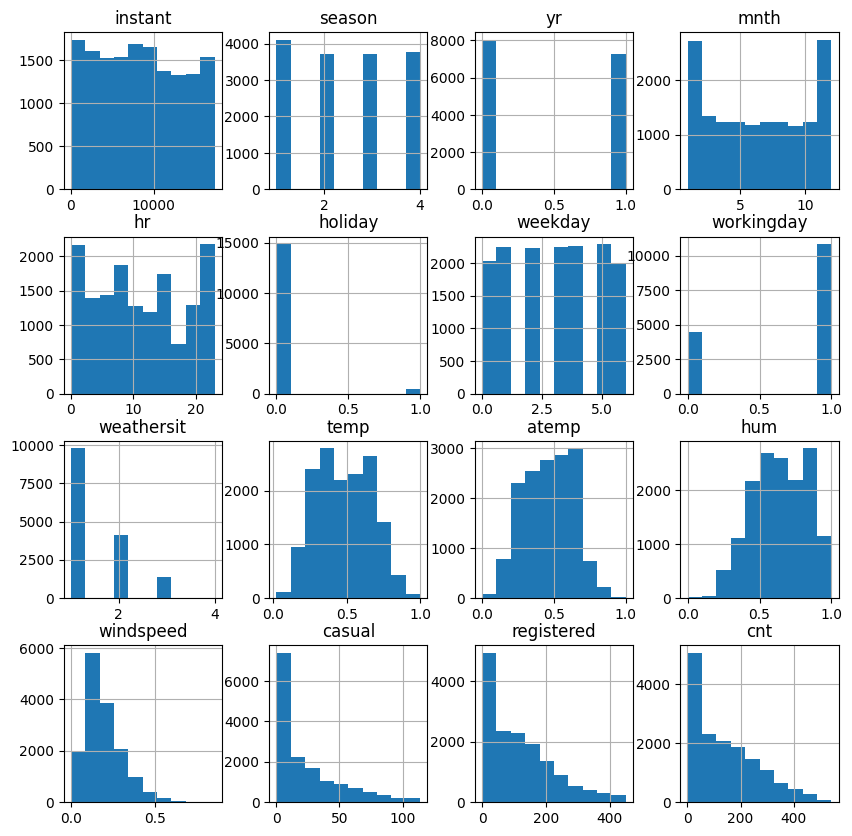

In [60]:
hour_df.hist(figsize=(10, 10))
plt.show()

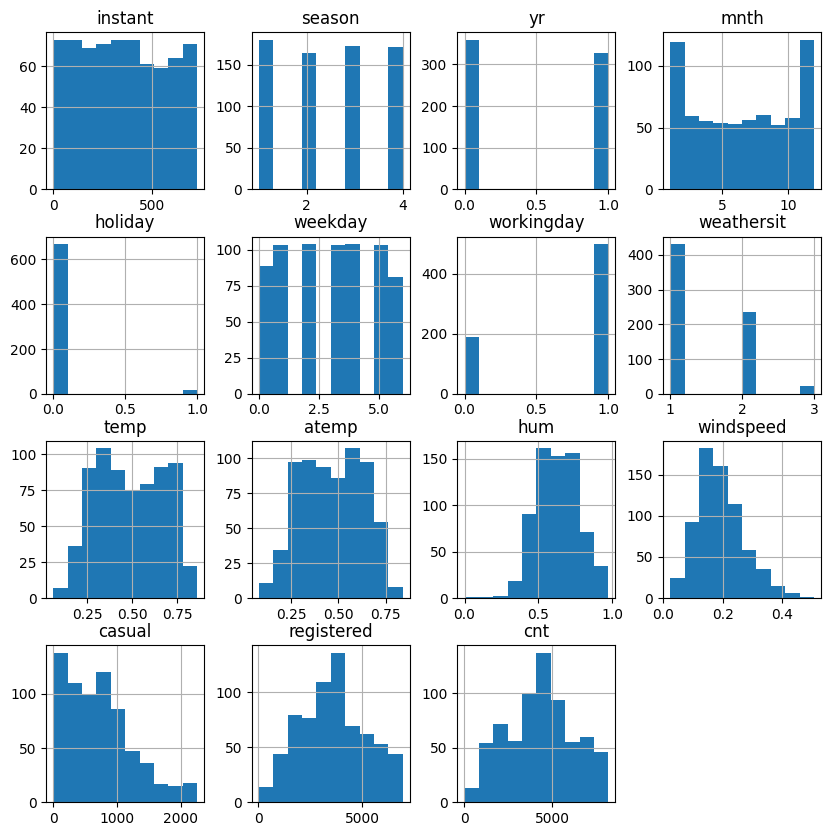

In [58]:
day_df.hist(figsize=(10, 10))
plt.show()

Check the distribution of the data.

In [55]:
h_numerical_features = hour_df.select_dtypes(include=np.number)
h_correlation_matrix = h_numerical_features.corr()

print(h_correlation_matrix)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.401935  0.858870  0.498376 -0.026683  0.017700   
season      0.401935  1.000000 -0.020072  0.823064 -0.021029 -0.016971   
yr          0.858870 -0.020072  1.000000 -0.014045 -0.024408  0.010581   
mnth        0.498376  0.823064 -0.014045  1.000000 -0.014109  0.016338   
hr         -0.026683 -0.021029 -0.024408 -0.014109  1.000000 -0.002849   
holiday     0.017700 -0.016971  0.010581  0.016338 -0.002849  1.000000   
weekday    -0.007245 -0.004324 -0.014046  0.009608 -0.005887 -0.096888   
workingday -0.006218  0.026350 -0.007479  0.000550  0.027944 -0.263632   
weathersit -0.003871 -0.009491 -0.008495  0.006856 -0.001143 -0.018239   
temp        0.123332  0.328186  0.016032  0.214328  0.092355 -0.055653   
atemp       0.124671  0.335316  0.014198  0.220571  0.089721 -0.059588   
hum         0.039641  0.179116 -0.061743  0.182077 -0.248451 -0.009386   
windspeed  -0.090964 -0.160666 -0.0223

In [56]:
d_numerical_features = day_df.select_dtypes(include=np.number)
d_correlation_matrix = d_numerical_features.corr()

print(d_correlation_matrix)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.415538  0.861911  0.506035  0.018040 -0.027143   
season      0.415538  1.000000 -0.003784  0.830003 -0.014151 -0.000890   
yr          0.861911 -0.003784  1.000000  0.000781  0.007409 -0.040059   
mnth        0.506035  0.830003  0.000781  1.000000  0.022759  0.015294   
holiday     0.018040 -0.014151  0.007409  0.022759  1.000000 -0.096145   
weekday    -0.027143 -0.000890 -0.040059  0.015294 -0.096145  1.000000   
workingday  0.060474  0.030112  0.070322  0.000303 -0.267236  0.064987   
weathersit -0.008657  0.024274 -0.038463  0.049816 -0.037452  0.037983   
temp        0.132869  0.341014  0.022433  0.224815 -0.061209 -0.007464   
atemp       0.133904  0.349281  0.019853  0.231773 -0.065065 -0.016151   
hum         0.029457  0.212060 -0.100607  0.227200 -0.016776 -0.040444   
windspeed  -0.114588 -0.235401 -0.009165 -0.212266  0.024023  0.006051   
casual      0.229999  0.262451  0.1710

Check correlation of the data in the two datasets.

In [95]:
pivot_table = hour_df.pivot_table(index='hr', values='cnt', aggfunc='mean')
pivot_table

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,182.246596
8,224.665988


Create pivot table of average rentals per hour.

In [75]:
workday_rentals = day_df[day_df['workingday'] == 1]['cnt'].sum()
total_rentals = day_df['cnt'].sum()
percentage_workday_rentals = (workday_rentals / total_rentals) * 100
print(f'{percentage_workday_rentals=}')

percentage_workday_rentals=76.59175207328242


Check the percentage of bike rentals on workdays.

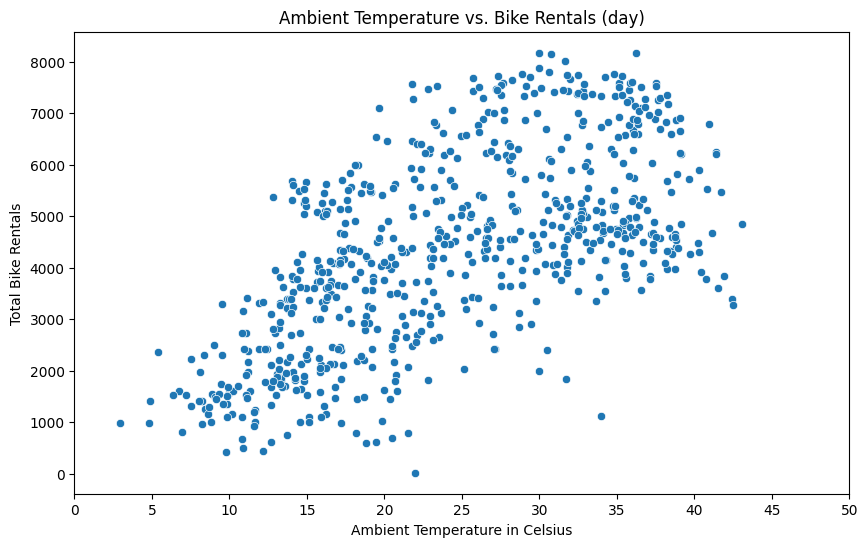

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Ambient Temperature vs. Bike Rentals (day)')
plt.xlabel('Ambient Temperature in Celsius')
plt.ylabel('Total Bike Rentals')

# Multiply x-axis values by 50 and update tick labels
x_ticks = plt.xticks()[0]
x_tick_labels = [str(int(tick * 50)) for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)
plt.show()

Find the relationship of ambient temperature and bike rentals.

In [92]:
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Correlation between ambient temperature and bike rentals: {correlation}")

Correlation between ambient temperature and bike rentals: 0.6300864053951729


Find correlation between ambient temperature and bike rentals.

**Insight:**
- The aggregated pivot tables tell us bike rentals are most used at 8-9 and 16-19 o'clock, and that there are the number of maximum and average users are higher during workdays, but the minimum number of users are higher during non-workdays.
- The data distributions of the casual, registered, and total users in the hour dataset are mostly right-skewed, while the registered and total users in the day dataset are more centered, with only the casual users having a right skew.
- 76.59% of all bikes are rented during workdays, indicating that most users rent bikes to commute to work.
- There is a positive correlation (0.63) between temperature and bike rentals, meaning that users are more likely to rent bikes when temperatures are high.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

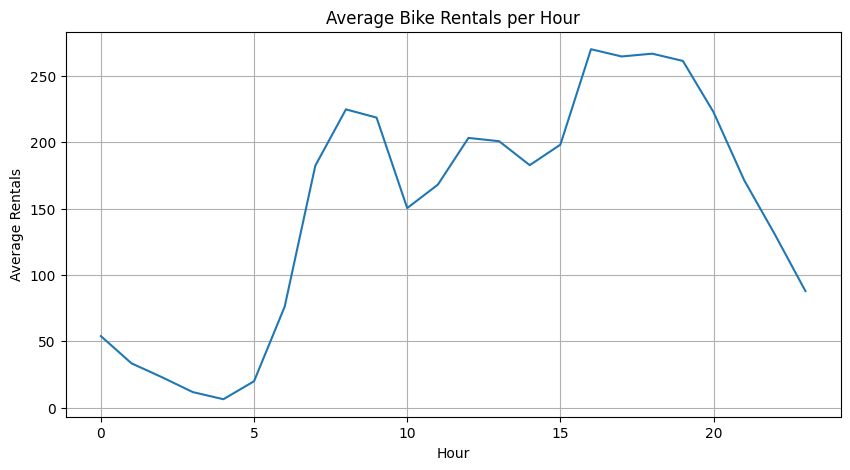

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(pivot_table.index, pivot_table['cnt'])
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals per Hour')
plt.grid(True)
plt.show()


### Pertanyaan 2:

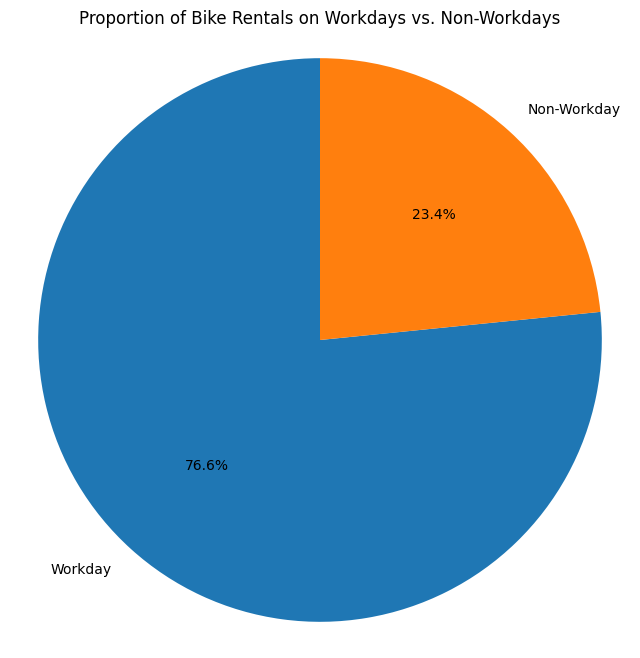

In [97]:
workday_rentals = day_df[day_df['workingday'] == 1]['cnt'].sum()
non_workday_rentals = day_df[day_df['workingday'] == 0]['cnt'].sum()

labels = ['Workday', 'Non-Workday']
sizes = [workday_rentals, non_workday_rentals]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Bike Rentals on Workdays vs. Non-Workdays')
plt.axis('equal')
plt.show()


### Pertanyaan 3:

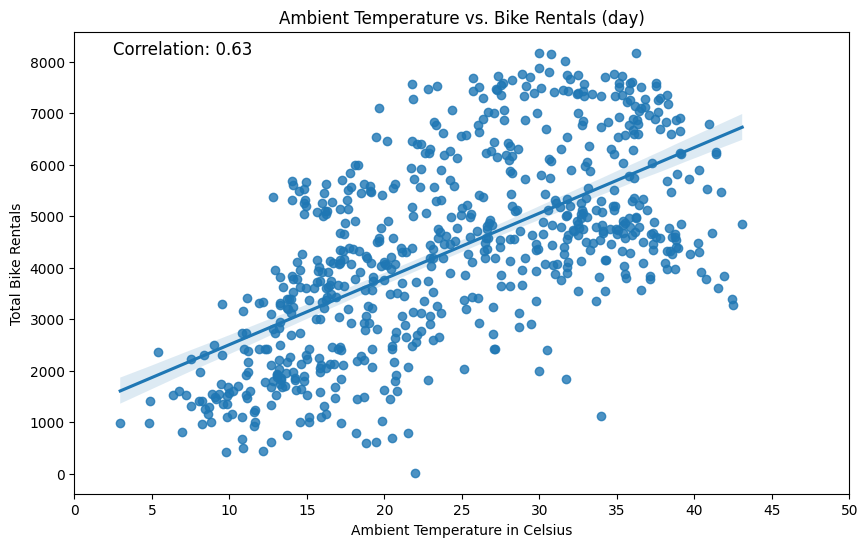

In [94]:
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=day_df)
plt.title('Ambient Temperature vs. Bike Rentals (day)')
plt.xlabel('Ambient Temperature in Celsius')
plt.ylabel('Total Bike Rentals')

# Multiply x-axis values by 50 and update tick labels
x_ticks = plt.xticks()[0]
x_tick_labels = [str(int(tick * 50)) for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Calculate and display correlation
correlation = day_df['temp'].corr(day_df['cnt'])
correlation_text = f"Correlation: {correlation:.2f}"
plt.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
plt.show()

**Insight:**
- The bike rentals are most active during the morning and in the afternoon, greatly decreasing at night.
- A large majority of bikes, 76.6% of them, are rented during workdays. This indicates that a majority of users use their rental bikes to commute to work.
- The moderately strong positive correlation of 0.63 can be seen in the best fit line of the scatter plot, indicating that the relationship between ambient temperature and number of rentals is very likely to be linear (i.e. number of rentals rises when ambient temperature rises, and vice-versa).

## Analisis Lanjutan (Opsional)

## Conclusion

- Rata-rata sepeda digunakan paling sering pada pagi dan sore hari, dengan puncak kecil pada siang hari, dan menurun drastis pada malam hari. Jam 16.00 merupakan puncak penggunaan sepeda, dengan rata-rata 269.965812 sepeda disewa pada jam tersebut, dan jam 4 adalah jam dimana sepeda paling jarang disewa, dengan rata-rata 6.352941 disewa pada jam tersebut.
- 76.6% sepeda dirental pada hari kerja, yang berarti mayoritas pengguna jasa rental kemungkinan memakai sepeda untuk pergi ke tempat kerja mereka.
- Terdapat korelasi cukup kuat (0.63) antara temperatur ambient dengan jumlah rental sepeda, yang berarti kemungkinan besar jumlah rental sepeda naik dengan kenaikan temperatur ambient.

Konklusi ini dapat digunakan untuk menentukan langkah bisnis selanjutnya, seperti memberi diskon pada jam sibuk pada pagi atau sore hari, atau membangun tempat rental sepeda di dekat daerah bisnis, atau melakukan kampanye bersepeda pada musim panas untuk menarik lebih banyak pelanggan.